In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 3.1.1 Hierarchical Clustering on new_customers dataset

In [2]:
data = pd.read_csv('SMAI-Dataset-hc-dataset/new_customers.csv')
data_v = data.drop('CustomerID',axis=1)
print(data_v.columns)

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [8]:
class my_hy:
    def __init__(self):
        pass

    def linkages(self,X_data, linkage_type):
        Z = linkage(X_data, linkage_type)
        self.linkage_type = linkage_type
        return Z

    def dendograms(self,Z):
        fig = plt.figure(figsize=(15, 10))
        plt.title(f'Dendrogram of {self.linkage_type}')
        plt.ylabel('Distance thresholds')
        plt.xlabel('Data points')
        df = dendrogram(Z)

In [9]:
# data preprocess
encoded_data = data_v.copy()
le = LabelEncoder()
encoded_column = le.fit_transform(data_v['Genre'])
encoded_data['Genre'] = encoded_column

mean = np.mean(encoded_data, axis=0)
std = np.std(encoded_data, axis=0)

# Perform normalization
normalized_data = (encoded_data - mean) / std
normalized_data = np.array(normalized_data)
print(normalized_data.shape)

(200, 4)


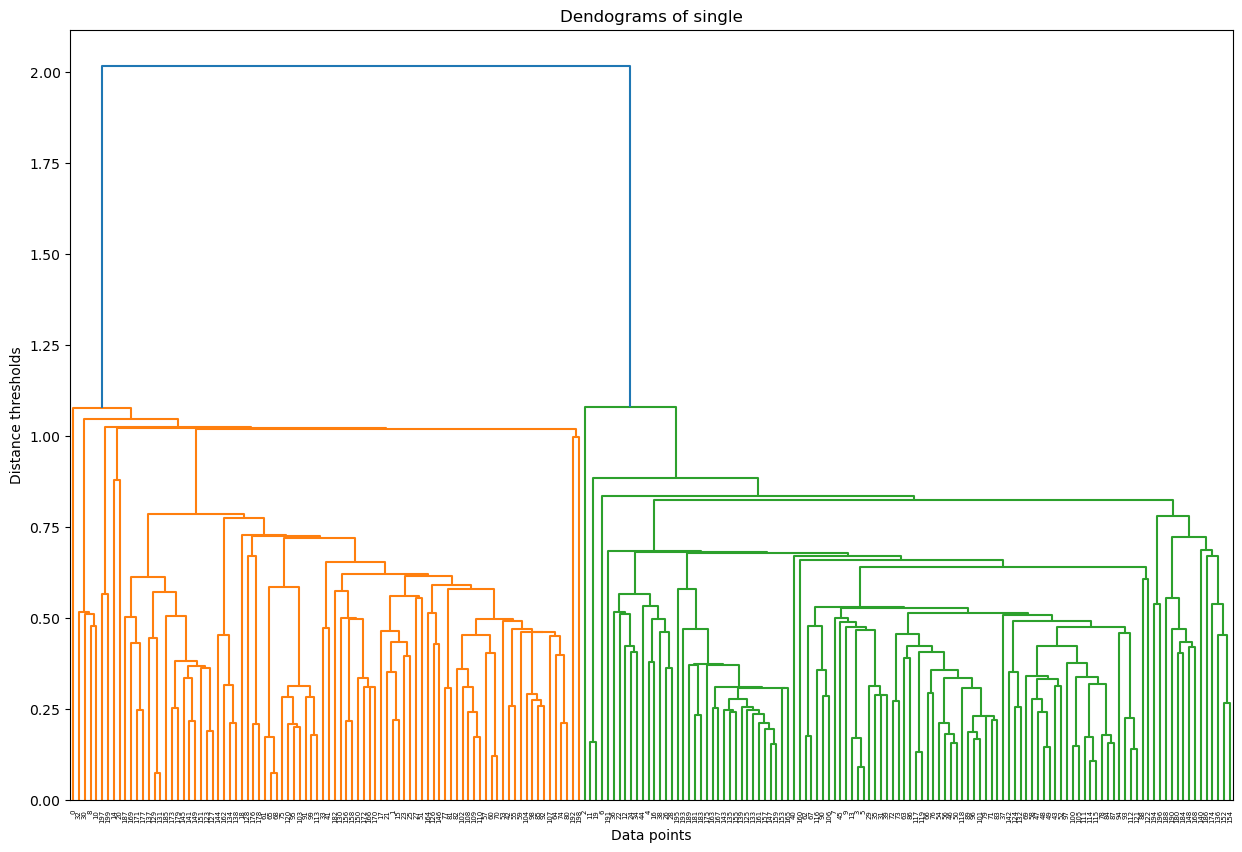

In [14]:
#linkage
hy = my_hy()
Z = hy.linkages(normalized_data,'single')
#dendogram
d_g = hy.dendograms(Z)

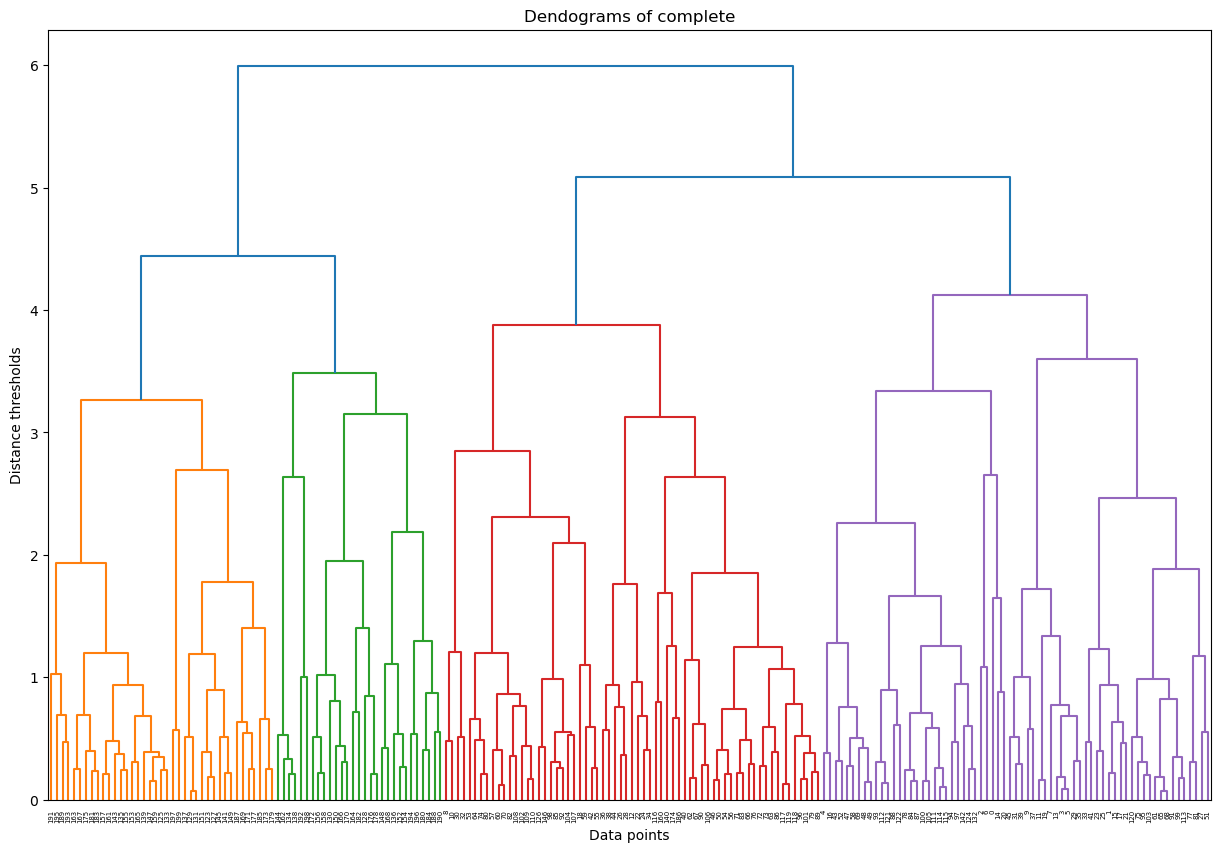

In [11]:
#linkage
hy = my_hy()
Z = hy.linkages(normalized_data,'complete')
#dendogram
d_g = hy.dendograms(Z)

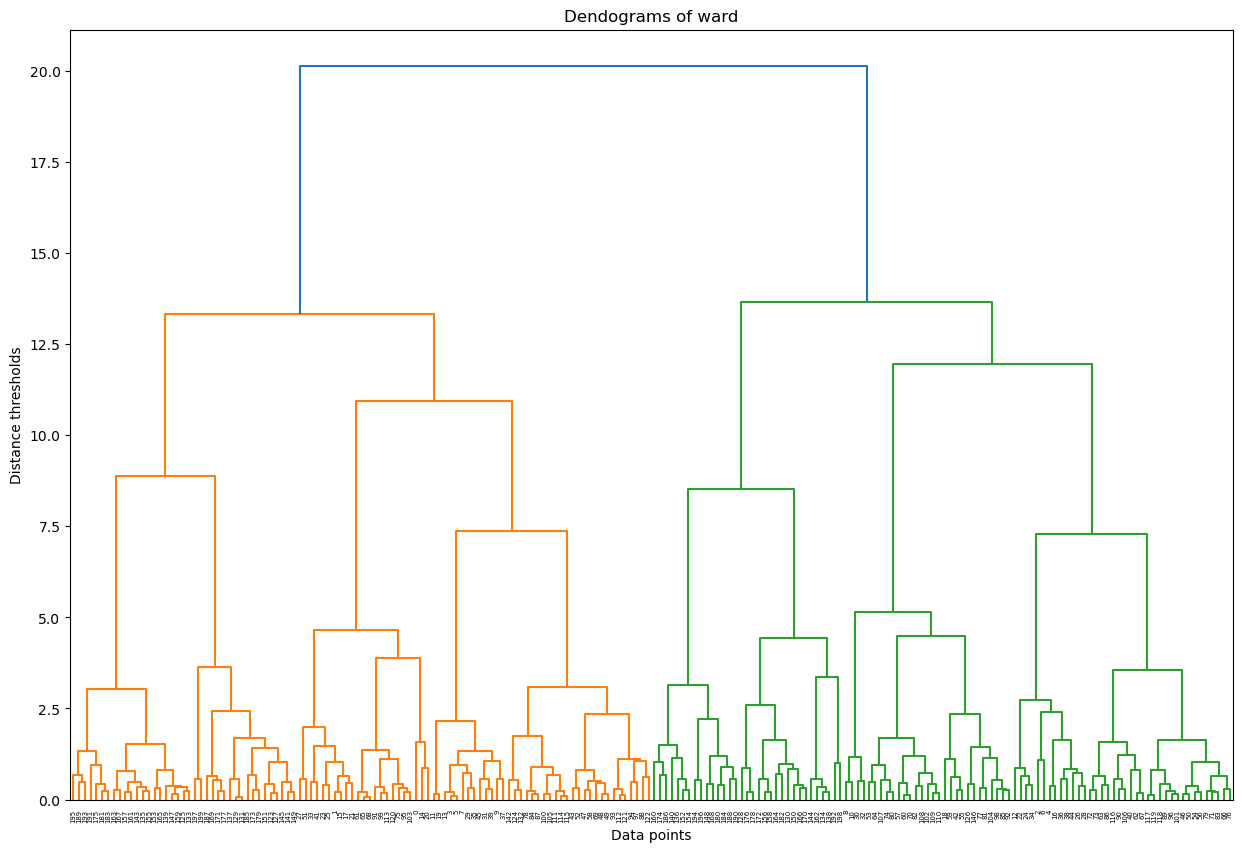

In [12]:
#linkage
hy = my_hy()
Z = hy.linkages(normalized_data,'ward')
#dendogram
d_g = hy.dendograms(Z)

Obsevations: After observaing above dendrograms the distance threshold of single is 1.25,complete is 4.1 and ward is 12.5.  
This is because it is clear from the dendograms that at these distance thresholds, all the distinct clusters are being merged.

# 3.1.2 Hierarchical Clustering on gene_expression dataset

In [32]:
data = pd.read_csv('SMAI-Dataset-gene-expression/gene.csv')
data_e = data.drop('ID_REF',axis=1)

# Perform normalization
mean = np.mean(data_e, axis=0)
std = np.std(data_e, axis=0)
normalized_data = (data_e - mean) / std
normalized_data = np.array(normalized_data)
print(normalized_data.shape)

(58, 12)


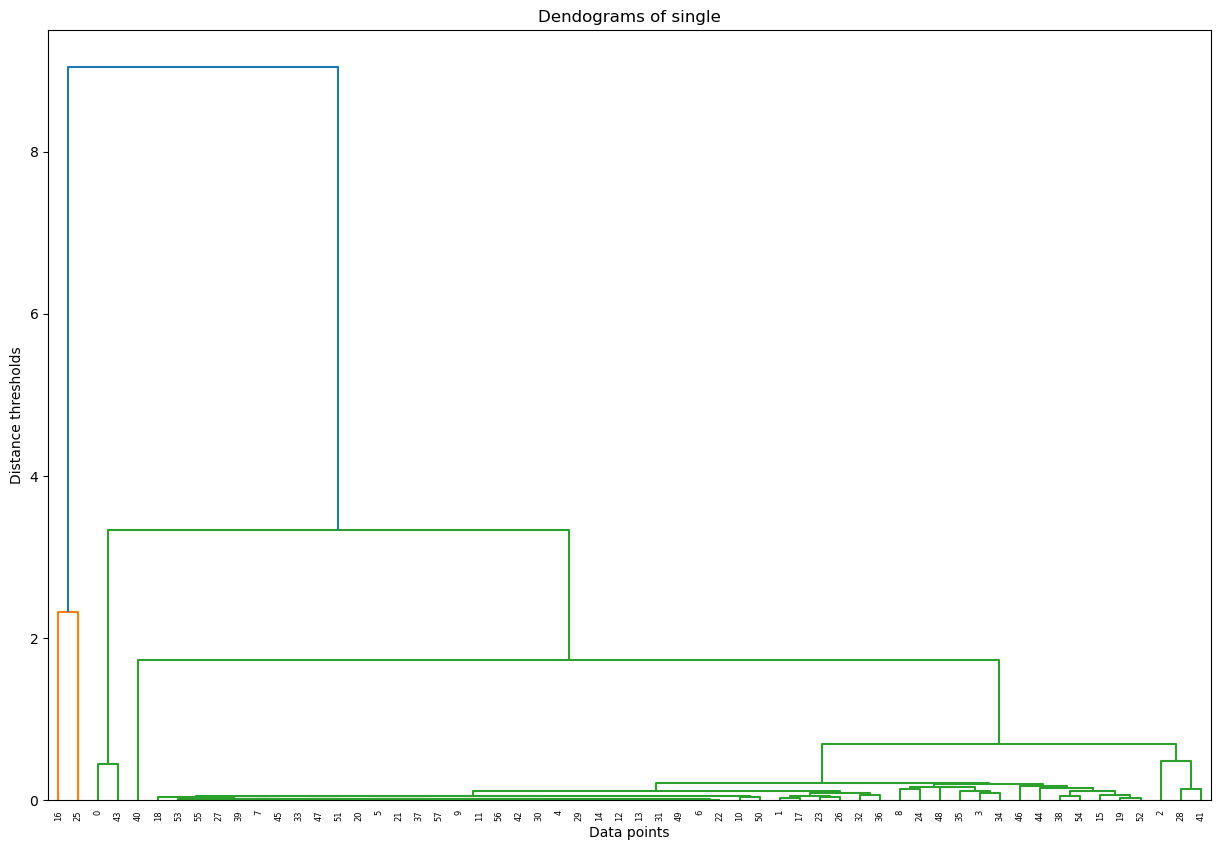

In [33]:
#linkage
hy = my_hy()
Z = hy.linkages(normalized_data,'single')
#dendogram
d_g = hy.dendograms(Z)

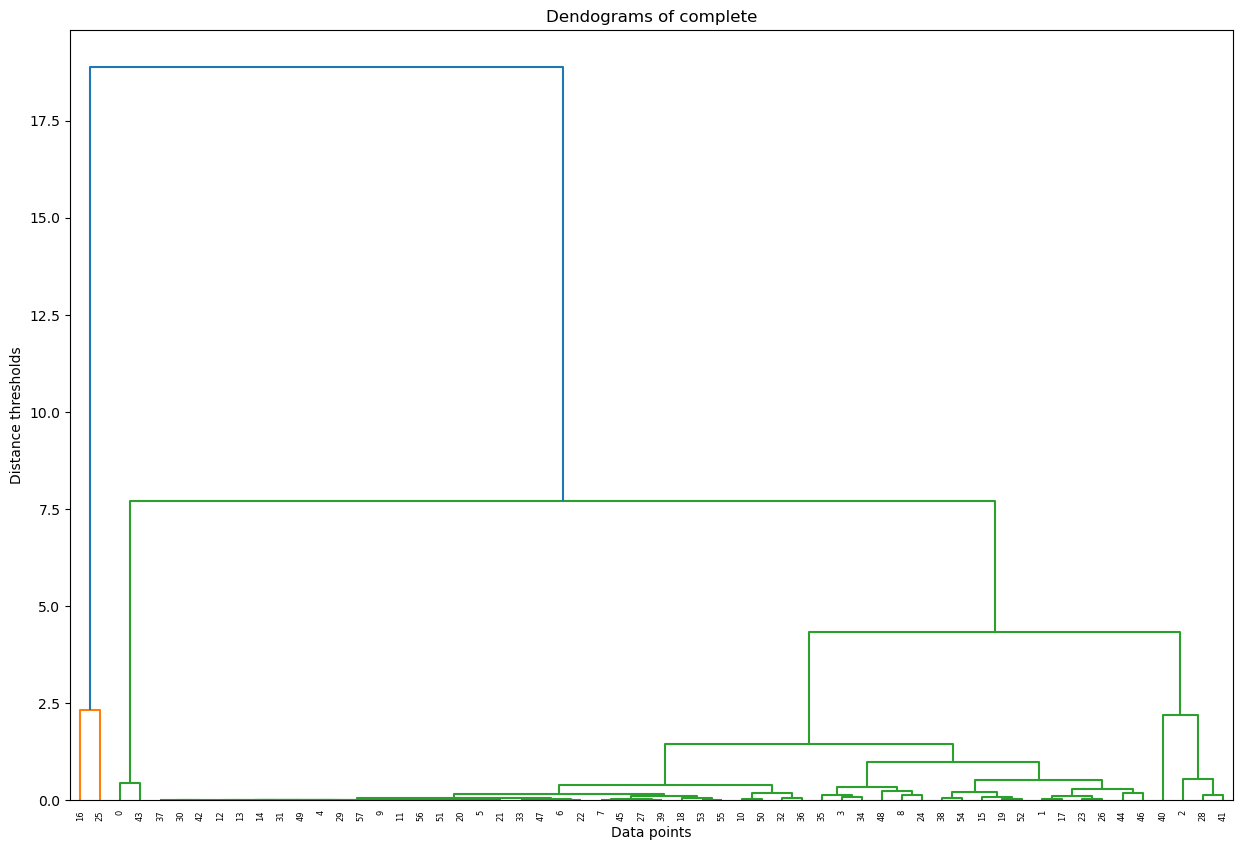

In [34]:
#linkage
hy = my_hy()
Z = hy.linkages(normalized_data,'complete')
#dendogram
d_g = hy.dendograms(Z)

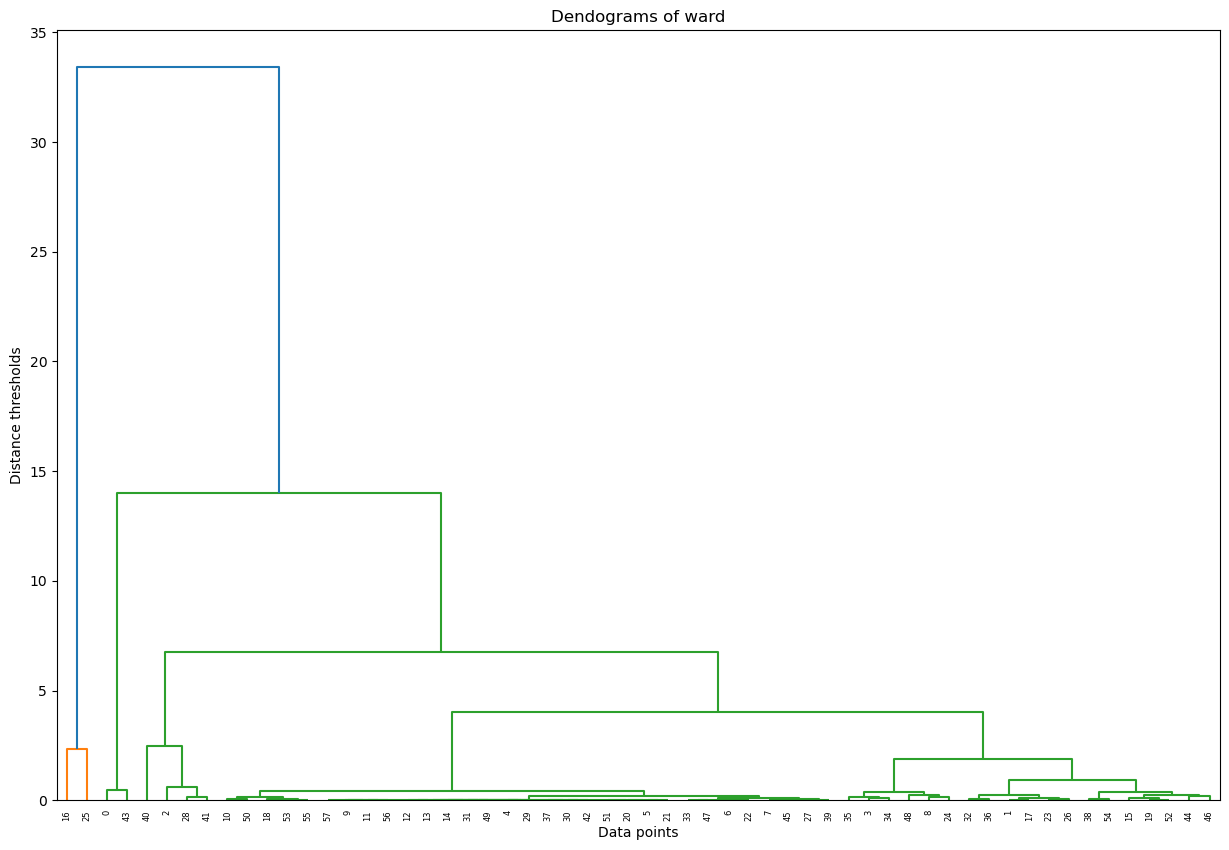

In [35]:
#linkage
hy = my_hy()
Z = hy.linkages(normalized_data,'ward')
#dendogram
d_g = hy.dendograms(Z)

Obsevations: After observaing above dendrograms the distance threshold of single is 4,complete is 10 and ward is 15.  
This is because it is clear from the dendograms that at these distance thresholds, all the distinct clusters are being merged.
in this data it is clear that it containg two clusters.